# Efficient Frontier

In [3]:
import pandas as pd

industry_returns = pd.read_csv(
    "../data/ind30_m_vw_rets.csv", 
    index_col = 0, 
    header = 0, 
    parse_dates = True
)

industry_returns = industry_returns / 100
industry_returns.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [6]:
industry_returns.index = pd.to_datetime(
    industry_returns.index, 
    format="%Y%m"
).to_period("M")


industry_returns.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [7]:
industry_returns.columns = industry_returns.columns.str.strip()
industry_returns.columns = industry_returns.columns.str.lower()
industry_returns.head(2)

,food,beer,smoke,games,books,hshld,clths,hlth,chems,txtls,...,telcm,servs,buseq,paper,trans,whlsl,rtail,meals,fin,other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676


In [9]:
%load_ext autoreload
%autoreload 2
import stark

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
industry_returns = stark.get_ind_returns()
industry_returns.head(2)

,food,beer,smoke,games,books,hshld,clths,hlth,chems,txtls,...,telcm,servs,buseq,paper,trans,whlsl,rtail,meals,fin,other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676


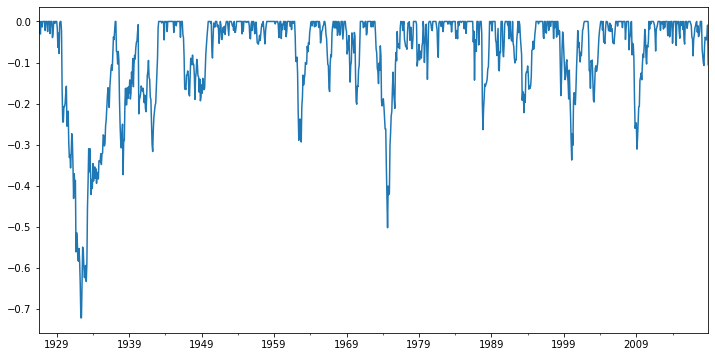

In [19]:
stark.calculate_drawdown(
    industry_returns["food"]
).drawdown.plot(
    figsize=(12, 6)
);

In [21]:
industry_list = ["food", "smoke", "coal", "beer", "fin"]
stark.calculate_var_gaussian(
    industry_returns[industry_list], 
    modified=True
)

food     0.061207
smoke    0.080292
coal     0.047359
beer     0.033881
fin      0.075199
dtype: float64

In [22]:
stark.calculate_var_gaussian(
    industry_returns, 
    modified = True
).sort_values().tail()

carry    0.094527
meals    0.098403
buseq    0.099377
games    0.100701
mines    0.102782
dtype: float64

In [23]:
stark.calculate_var_gaussian(
    industry_returns, 
    modified = True
).sort_values().head()

beer     0.033881
coal     0.047359
food     0.061207
telcm    0.064719
hshld    0.064886
dtype: float64

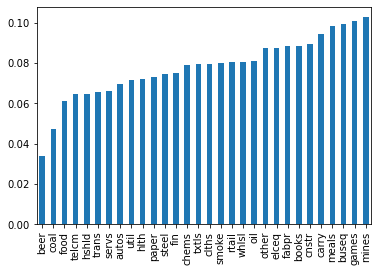

In [25]:
stark.calculate_var_gaussian(
    industry_returns, 
    modified = True
).sort_values().plot.bar();

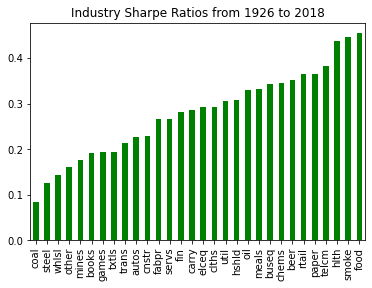

In [30]:
stark.calculate_sharpe_ratio(
    input_returns = industry_returns, 
    risk_free_rate = 0.03, 
    periods_per_year = 12, 
).sort_values().plot.bar(
    title="Industry Sharpe Ratios from 1926 to 2018", 
    color="Green"
);

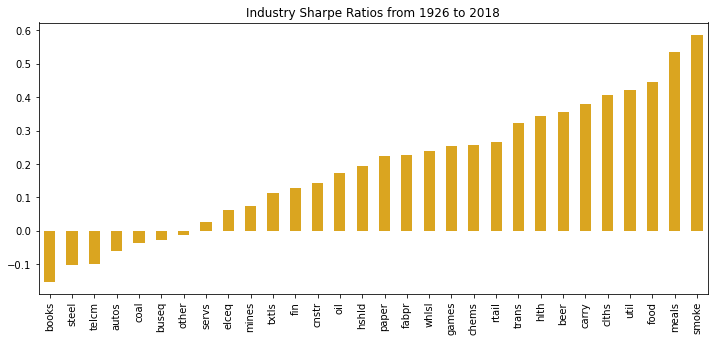

In [33]:
stark.calculate_sharpe_ratio(
    input_returns = industry_returns.loc["2000":], 
    risk_free_rate = 0.03, 
    periods_per_year = 12, 
).sort_values().plot.bar(
    title="Industry Sharpe Ratios from 1926 to 2018", 
    color="goldenrod", 
    figsize=(12, 5)
);

In [34]:
annualized_returns_subset = stark.calculate_annualize_rets(
    industry_returns.loc["1995":"2000"], 
    periods_per_year = 12
)

<AxesSubplot:>

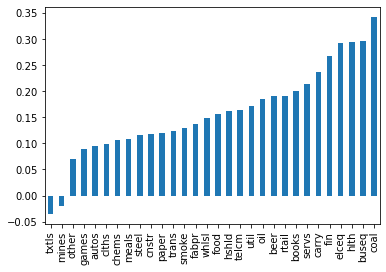

In [36]:
annualized_returns_subset.sort_values().plot.bar()

In [38]:
cov_mat_ind = industry_returns.loc["1995":"2000"].cov()
cov_mat_ind.shape

(30, 30)

In [43]:
cov_mat_ind.style.background_gradient(cmap ="Blues")  

,food,beer,smoke,games,books,hshld,clths,hlth,chems,txtls,cnstr,steel,fabpr,elceq,autos,carry,mines,coal,oil,util,telcm,servs,buseq,paper,trans,whlsl,rtail,meals,fin,other
food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,0.001282,0.000027,0.000613,0.001146,0.000547,0.001419,0.000829,0.000034,0.000933,0.000858,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,0.001945,0.000131,0.000666,0.001107,0.001296,0.001804,0.000272,0.001261,0.000672,0.000631,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,0.001181,0.000167,0.000668,-0.000013,0.000223,0.001485,0.001311,-0.000544,0.000849,0.001118,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,0.001723,0.002670,0.002498,0.001980,0.001994,0.001644,0.001600,0.001557,0.000968,0.000023,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,0.001531,0.001797,0.001704,0.002084,0.001550,0.001301,0.001281,0.002051,0.000868,0.000455,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,0.001770,0.001050,0.001125,0.001426,0.001466,0.001704,0.000598,0.001787,0.000541,0.000350,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,0.002486,0.001702,0.002430,0.002239,0.002521,0.002873,0.002467,0.002433,0.001646,0.000646,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,0.001217,0.000836,0.000768,0.001108,0.000851,0.000755,0.001103,0.001549,0.000523,0.000543,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,0.001829,0.002327,0.002273,0.001560,0.001882,0.002374,0.002345,0.001910,0.001843,0.000545,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,0.001648,0.001321,0.001576,0.001102,0.001811,0.001842,0.001274,0.000652,0.001104,0.000777,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668
